# chapter 5 - Resampling Methods

- [Load dataset](#Load-dataset)
- [5.1-Cross-Validation](#5.1-Cross-Validation)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-pastel')

## Load dataset

In [5]:
df1 = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## 5.1 Cross-Validation

### Figure 5.2 - Validation Set Approach
Using Polynomial feature generation in scikit-learn<BR>
http://scikit-learn.org/dev/modules/preprocessing.html#generating-polynomial-features

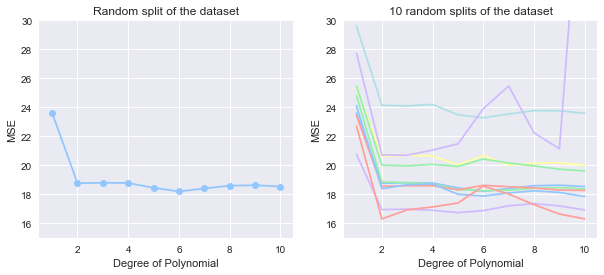

In [13]:
t_prop = 0.5
p_order = np.arange(1,11)
r_state = np.arange(0,10)

X,y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size, r_state.size))

regr = skl_lm.LinearRegression()

# Generation 10 random split of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X_poly, df1.mpg.ravel(), test_size=t_prop,
                                                       random_state=y[i,j])
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j] = mean_squared_error(y_test, pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
# Left plot (first split)
ax1.plot(X.T[0], Z.T[0],'-o')
ax1.set_title('Random split of the dataset')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the dataset')

for ax in fig.axes:
    ax.set_ylabel('MSE')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5);

## Figure 5.4 - LOOCV and 10-fold

In [15]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)

# LeaveOneOut CV
regr = skl_lm.LinearRegression()
loo = LeaveOneOut(df1.index.size)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, df1.mpg, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)


In [17]:
scores[:5]

[-24.231513517929226,
 -19.248213124489411,
 -19.334984064113971,
 -19.424430309374937,
 -19.033220248952038]

In [19]:
# k-fold CV
folds = 10
elements = len(df1.index)

X,y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size, r_state.size))

regr = skl_lm.LinearRegression()
for (i,j), v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    kf_10 = KFold(elements, n_folds=folds, random_state=y[i,j])
    Z[i,j] = cross_val_score(regr,X_poly, df1.mpg, cv=kf_10,
                            scoring='neg_mean_squared_error').mean()

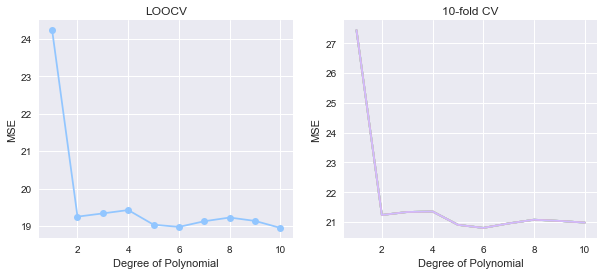

In [24]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
# Left Plot
ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')
# Right Plot
ax2.plot(X, Z*-1)
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel("MSE")
    ax.set_xlabel("Degree of Polynomial")
    ax.set_xlim(0.5,10.5);